<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P5E8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

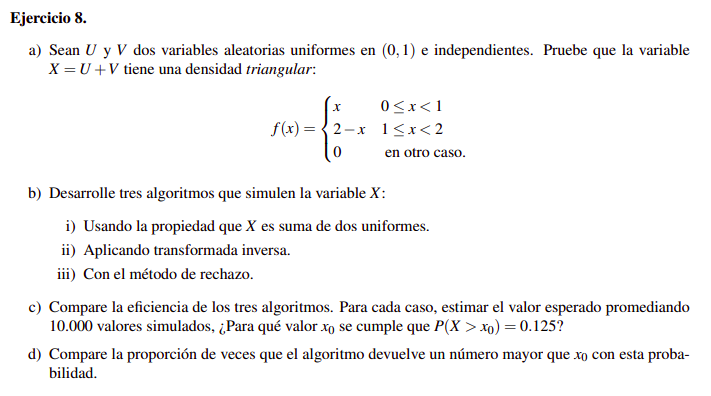

## Grafico de chatGPT

🎯 ¿Qué te cuenta este gráfico?
Visualmente se ve el triángulo, mostrando si es simétrico o no.

El modo es el punto más alto, donde es más probable que caiga la variable.

La media no coincide con el modo si la distribución es asimétrica.

Te permite comparar la asimetría con otras distribuciones (como la normal).

> El modo de una variable aleatoria es el valor más probable, es decir, el valor en el que la función de densidad (o masa) alcanza su máximo. Es especialmente útil cuando la distribución no es simétrica, y nos permite entender dónde se concentra la mayor probabilidad.
Si hay varios valores con la misma máxima densidad, la distribución se llama multimodal (puede haber 2 modos = bimodal, etc.).

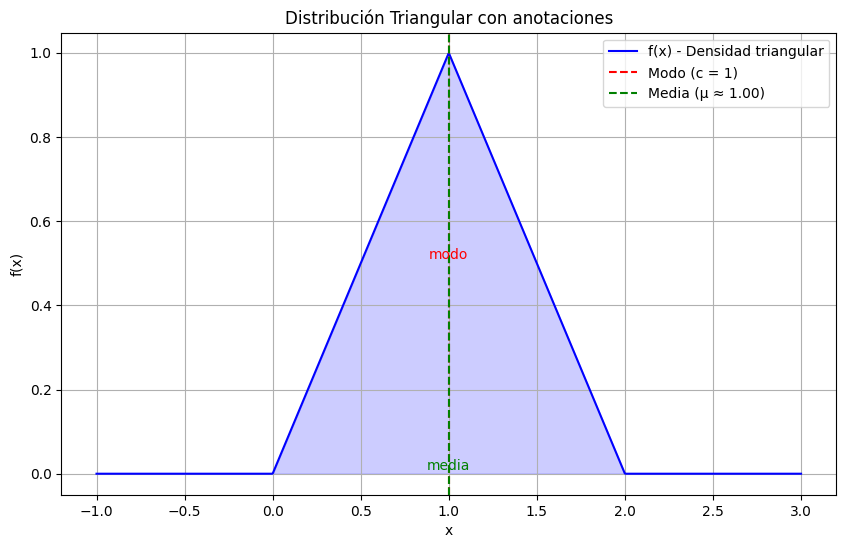

In [29]:
#@title { vertical-output: true}
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang

# Parámetros de la distribución triangular
a, b, c = 0, 2, 1  # soporte: [a, b], modo: c
c_scaled = (c - a) / (b - a)  # reescalar el modo para scipy

# Eje x y PDF
x = np.linspace(a - 1, b + 1, 1000)
pdf = triang.pdf(x, c_scaled, loc=a, scale=b - a)

# Cálculo de media y varianza
media = (a + b + c) / 3

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='f(x) - Densidad triangular', color='blue')
plt.fill_between(x, pdf, alpha=0.2, color='blue')

# Anotaciones
plt.axvline(c, color='red', linestyle='--', label=f'Modo (c = {c})')
plt.axvline(media, color='green', linestyle='--', label=f'Media (μ ≈ {media:.2f})')
plt.text(c, triang.pdf(c_scaled, c_scaled, loc=a, scale=b-a)+0.01, 'modo', color='red', ha='center')
plt.text(media, 0.01, 'media', color='green', ha='center')

# Estética
plt.title("Distribución Triangular con anotaciones")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

# Ejercicio

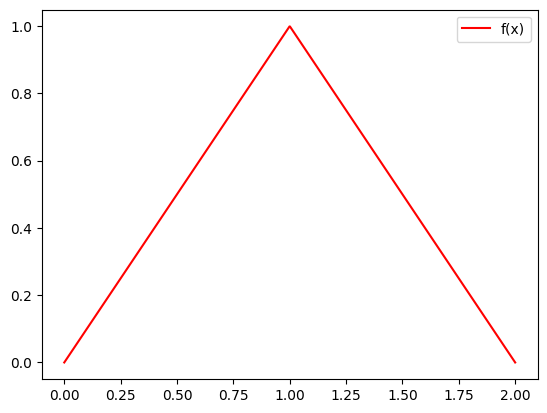

In [40]:
#@title { vertical-output: true}
import seaborn as sns
from random import random

NUMERO_DE_MUESTRAS = 100_000
DOMINIO = np.linspace(0, 2, 1000)

def f(x):
  return np.where(
      (0 <= x) & (x <= 1),
      x,
      np.where(
          (1 < x) & (x <= 2),
          2 - x,
          0
      )
  )

sns.lineplot(x=DOMINIO, y=f(DOMINIO), color='red', label='f(x)')
plt.show()

## 8.b

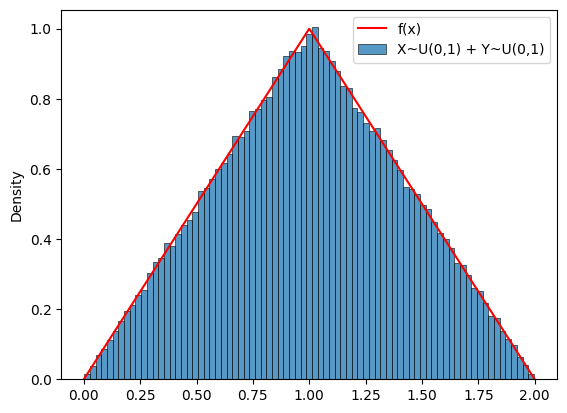

In [31]:
#@title { vertical-output: true}

# Suma de dos uniformes

def muestreador_S2U():
  return random() + random()

muestras_S2U = [muestreador_S2U() for _ in range(NUMERO_DE_MUESTRAS)]

sns.lineplot(x=DOMINIO, y=f(DOMINIO), color='red', label='f(x)')
sns.histplot(muestras_S2U, stat='density', label='X~U(0,1) + Y~U(0,1)')
plt.legend()
plt.show()

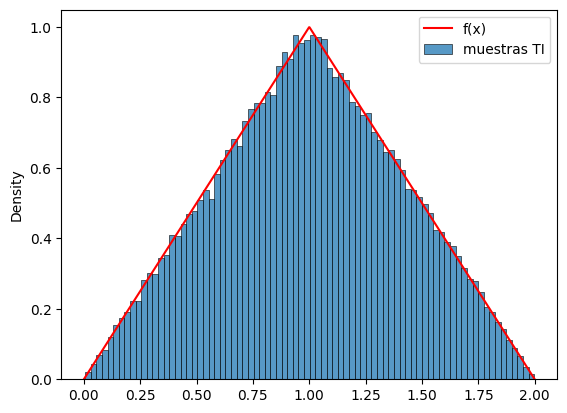

In [32]:
#@title { vertical-output: true}

# TI

def muestreador_TI():
  u = random()
  return np.sqrt(2*u) if u < 0.5 else 2-np.sqrt(2*(1-u))

muestras_TI = [muestreador_TI() for _ in range(NUMERO_DE_MUESTRAS)]

sns.lineplot(x=DOMINIO, y=f(DOMINIO), color='red', label='f(x)')
sns.histplot(muestras_TI, stat='density', label='muestras TI')
plt.legend()
plt.show()

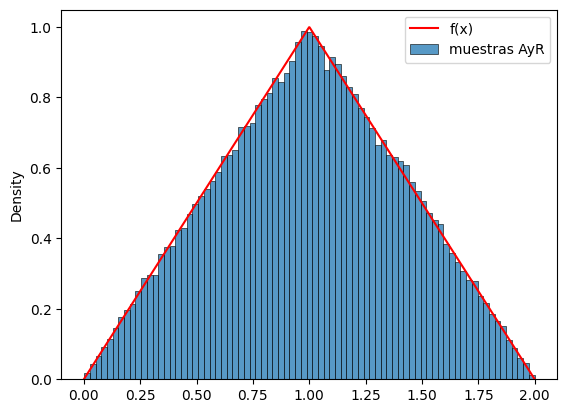

In [33]:
#@title { vertical-output: true}

# AyR
def muestreador_AyR():
  while True:
    muestra = random() * 2
    u = random()
    if u < f(muestra):
      return muestra


muestras_AyR = [muestreador_AyR() for _ in range(NUMERO_DE_MUESTRAS)]

sns.lineplot(x=DOMINIO, y=f(DOMINIO), color='red', label='f(x)')
sns.histplot(muestras_AyR, stat='density', label='muestras AyR')
plt.legend()
plt.show()

## 8.c

In [34]:
%%timeit
muestreador_S2U()

129 ns ± 29.4 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [35]:
%%timeit
muestreador_TI()

1.39 µs ± 293 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [36]:
%%timeit
muestreador_AyR()

14.1 µs ± 2.74 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [37]:
print('Esperanza estimada de las muestras')
print(f'S2U: {np.mean(muestras_S2U)}')
print(f'TI: {np.mean(muestras_TI)}')
print(f'AyR: {np.mean(muestras_AyR)}')

Esperanza estimada de las muestras
S2U: 0.9996828243689488
TI: 1.0009297537758153
AyR: 1.0008421678376767


## 8.d

In [38]:
def probabilidad_de(condicion, muestreador, n=NUMERO_DE_MUESTRAS):
  return sum(condicion(muestreador()) for _ in range(n)) / n

probabilidad_de(lambda x: x > 1.5, muestreador_S2U)

0.12441